In [4]:
import pandas as pd
import seaborn as srn
import statistics  as sts

In [5]:
#importar dados
dataset = pd.read_csv("Churn.csv", sep=";")
#visulizar
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [6]:
# Alterando os nomes das colunas
dataset.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito",
                    "Ativo","Salario","Saiu"]

In [7]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [8]:
agrupado = dataset.groupby("Estado").size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

In [9]:
# Dados categóricos na maioria dos casos podem receber o valor da moda.
# Tratando a coluna Estado
dataset.loc[dataset['Estado'].isin(['RP','SP','TD']),'Estado'] = "RS"

In [10]:
agrupado = dataset.groupby("Genero").size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [11]:
# Tratando a coluna Gênero
dataset.loc[dataset['Genero'].isin(['F','Fem']),'Genero'] = "Feminino"
dataset['Genero'].isnull().sum()
dataset['Genero'].fillna("Masculino",inplace=True)
dataset.loc[dataset['Genero'] == 'M','Genero'] = "Masculino"


In [12]:
# Tratando a coluna Idade
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 100),'Idade']
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 100),'Idade'] = sts.median(dataset['Idade'])


In [59]:
# Tratando a coluna salário
mediana = sts.median(dataset['Salario'])
dataset['Salario'].fillna(mediana,inplace=True) # Alterando os valores NaN pela mediana
dp = sts.stdev(dataset['Salario'])
dataset['Salario'].isnull().sum()
dataset.loc[dataset['Salario'] >= 2*dp,'Salario'] = mediana # Removendo os outliers
dataset['Salario'].describe()

70518.0

In [16]:
# Removendo duplicatas pela coluna ID
dataset[dataset.duplicated(['Id'],keep=False)]
dataset.drop_duplicates(subset="Id", keep='first',inplace=True)

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


# Gráficos

<AxesSubplot:xlabel='Genero'>

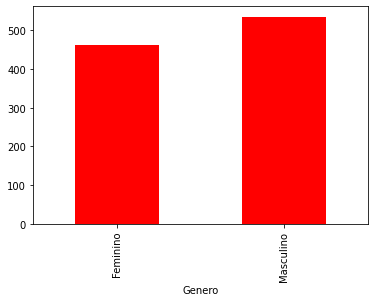

In [19]:
# Quantidade de Homens e Mulheres
grupo_idade = dataset.groupby(['Genero']).size()
grupo_idade
grupo_idade.plot.bar(color = 'red')


<AxesSubplot:xlabel='Estado'>

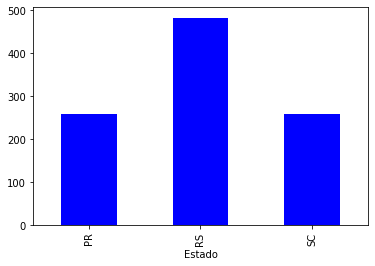

In [20]:
# Barplot dos Estados
grupo_estado = dataset.groupby(['Estado']).size()
grupo_estado.plot.bar(color = 'blue')

d:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Score')

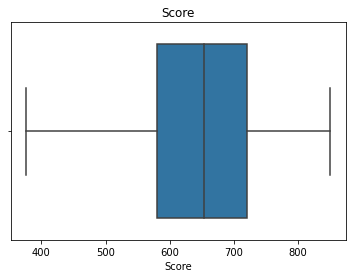

In [21]:
# Boxplot do Score
srn.boxplot(dataset['Score']).set_title('Score')

d:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Score')

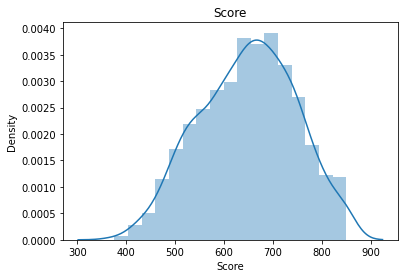

In [22]:
# Distplot do Score
srn.distplot(dataset['Score']).set_title('Score')

d:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Saldo')

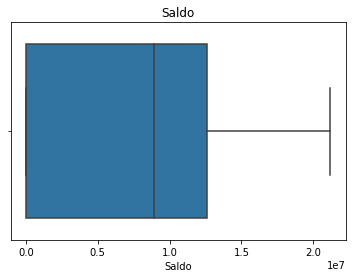

In [23]:
# Boxplot do Saldo
srn.boxplot(dataset['Saldo']).set_title('Saldo')